In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

import os
%matplotlib inline
print('--- load data--')
# Загружаем и нормализуем данные
(x_train, _),_ = fashion_mnist.load_data()
x_train = x_train / 255.0
# Преобразуем в одномерный массив
x_train = x_train.reshape((60000, 28*28))
np.random.shuffle(x_train)

--- load data--


In [22]:
print('--- compile utils --')
def show_results(input, output,name, in_str = 'MNIST', out_str = 'RBM'):
    print('--- Plotting data --')
    fig, axs = plt.subplots(10, 5, figsize=(11, 11))
    k=0
    for j in range(0,10,2):
        for i in range(0, 5):
            axs[j, i].imshow(input[k])
            axs[j, i].axis('off')
            axs[j, i].set_title("{} {}".format(in_str,k), size=9)
            axs[j+1, i].imshow(output[k])
            axs[j+1, i].axis('off')
            axs[j+1, i].set_title("{} {}".format(out_str,k), size=9)
            k=k+1
    fig.subplots_adjust(left=0.3,
                        right=0.8,
                        hspace=0.3)
    fig.savefig('{}.png'.format(name))
    fig.show()

def show_img_from_array(a):
    plt.imshow(a.reshape((28, 28)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def get_result_image(input, rbm):
    result = np.zeros((len(input),784))
    for i in range(0, len(input)):
        sample = input[i].reshape(1,784)
        result[i]=rbm.reconstruct(sample)
    return result

--- compile utils --


--- Plotting data --


D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


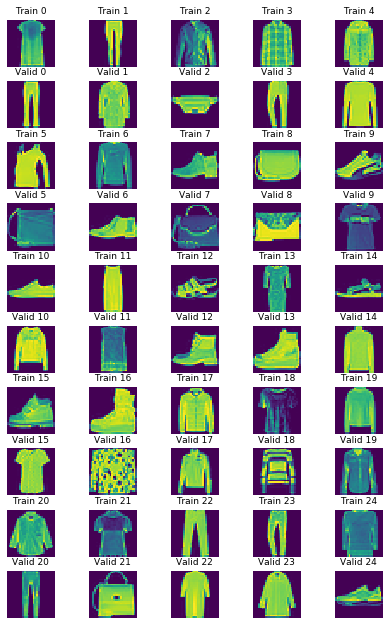

In [23]:
x_tr = x_train[0:25]
x_vl = x_train[25:51]

show_results(input=x_tr.reshape(len(x_tr), 28, 28),
             output=x_vl.reshape(len(x_vl), 28, 28),
             in_str='Train', out_str='Valid',
             name='MNIST'
             )

In [24]:
from liteRBM import liteRBM

nn_0 = 50
batch_size = 1
epochs = 35
rbm = liteRBM(n_visible=784, n_hidden=nn_0, lr=0.01, momentum=0.8)
rbm.train(x_tr, x_vl, n_epoches=epochs, batch_size=batch_size)
print('----------train done -------')

training epoche 0/35:validation loss: 0.313017339
training epoche 1/35:validation loss: 0.286202937
training epoche 2/35:validation loss: 0.277059823
training epoche 3/35:validation loss: 0.272199124
training epoche 4/35:validation loss: 0.268349499
training epoche 5/35:validation loss: 0.266171753
training epoche 6/35:validation loss: 0.263742357
training epoche 7/35:validation loss: 0.262044668
training epoche 8/35:validation loss: 0.260947734
training epoche 9/35:validation loss: 0.260049880
training epoche 10/35:validation loss: 0.259001642
training epoche 11/35:validation loss: 0.259048581
training epoche 12/35:validation loss: 0.258312911
training epoche 13/35:validation loss: 0.257318735
training epoche 14/35:validation loss: 0.256965667
training epoche 15/35:validation loss: 0.257191360
training epoche 16/35:validation loss: 0.255998731
training epoche 17/35:validation loss: 0.255498707
training epoche 18/35:validation loss: 0.256022573
training epoche 19/35:validation loss: 0.

--- Plotting data --


D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


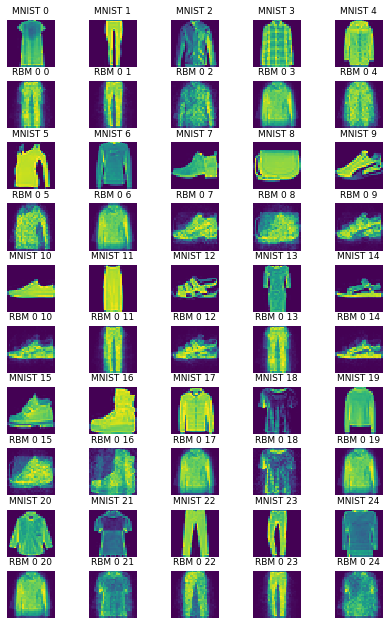

In [25]:
samples = x_tr.reshape(len(x_tr), 28, 28)
result_1 = get_result_image(x_tr, rbm).reshape(len(x_tr), 28, 28)
show_results(samples, result_1, out_str = 'RBM 0',name = 'RBM_0')

In [26]:
print('--- compile clas --')
class stacked_rbm():
    def __init__(self, nn_1, nn_2,nn_3):
        self.input = liteRBM(n_visible=784, n_hidden=nn_1, lr=0.01, momentum=0.8)
        self.hidden = liteRBM(n_visible=784, n_hidden=nn_2, lr=0.01, momentum=0.8)
        self.out = liteRBM(n_visible=784, n_hidden=nn_3, lr=0.01, momentum=0.8)

    def chain_fit(self,x,y,epochs, batch_size):
        print('--------- train input rbm -----------')
        self.input.train(x, y, n_epoches=epochs, batch_size=batch_size)
        x1 = self.input.reconstruct(x)
        print('--------- train hidden rbm -----------')
        self.hidden.train(x1, y, n_epoches=epochs, batch_size=batch_size)
        x2 = self.input.reconstruct(x1)
        print('--------- train out rbm -----------')
        self.out.train(x2, y, n_epoches=epochs, batch_size=batch_size)
        print('--------- train finished -----------')

    def fit(self,x,y,epochs, batch_size):
        print('--------- train input rbm -----------')
        self.input.train(x, y, n_epoches=epochs, batch_size=batch_size)
        print('--------- train hidden rbm -----------')
        self.hidden.train(x, y, n_epoches=epochs, batch_size=batch_size)
        print('--------- train out rbm -----------')
        self.out.train(x, y, n_epoches=epochs, batch_size=batch_size)
        print('--------- train finished -----------')

    def reconstruct(self, x):
        x1 = self.input.reconstruct(x)
        x2 = self.hidden.reconstruct(x1)
        return self.out.reconstruct(x2)

--- compile clas --


In [27]:
nn_2 = 200
nn_1 = 100
st_rbm = stacked_rbm(nn_2, nn_1, nn_0)
st_rbm.fit(x_tr,x_vl,epochs, batch_size)

--------- train input rbm -----------
training epoche 0/35:validation loss: 0.301312089
training epoche 1/35:validation loss: 0.274128735
training epoche 2/35:validation loss: 0.265317857
training epoche 3/35:validation loss: 0.259651840
training epoche 4/35:validation loss: 0.259550989
training epoche 5/35:validation loss: 0.257381737
training epoche 6/35:validation loss: 0.254576653
training epoche 7/35:validation loss: 0.252887279
training epoche 8/35:validation loss: 0.252065152
training epoche 9/35:validation loss: 0.250289202
training epoche 10/35:validation loss: 0.249335796
training epoche 11/35:validation loss: 0.248254105
training epoche 12/35:validation loss: 0.247778445
training epoche 13/35:validation loss: 0.246827573
training epoche 14/35:validation loss: 0.247254297
training epoche 15/35:validation loss: 0.247635409
training epoche 16/35:validation loss: 0.247104689
training epoche 17/35:validation loss: 0.246691942
training epoche 18/35:validation loss: 0.245997056
tra

--- Plotting data --


D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


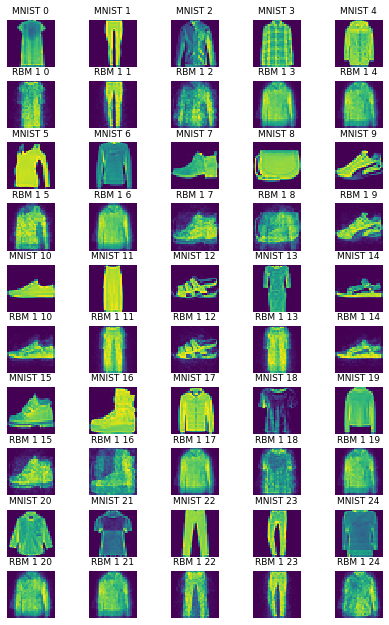

In [28]:
result_2 = get_result_image(x_tr, st_rbm).reshape(len(x_tr), 28, 28)
show_results(samples, result_2,out_str = 'RBM 1', name = 'RBM_1')

In [29]:
chain_rbm = stacked_rbm(nn_2, nn_1, nn_0)
chain_rbm.chain_fit(x_tr,x_vl,epochs, batch_size)

--------- train input rbm -----------
training epoche 0/35:validation loss: 0.318319857
training epoche 1/35:validation loss: 0.271265119
training epoche 2/35:validation loss: 0.264929056
training epoche 3/35:validation loss: 0.260405838
training epoche 4/35:validation loss: 0.258867025
training epoche 5/35:validation loss: 0.255374074
training epoche 6/35:validation loss: 0.251846850
training epoche 7/35:validation loss: 0.252229035
training epoche 8/35:validation loss: 0.250641853
training epoche 9/35:validation loss: 0.249747664
training epoche 10/35:validation loss: 0.249756590
training epoche 11/35:validation loss: 0.248430863
training epoche 12/35:validation loss: 0.248929724
training epoche 13/35:validation loss: 0.248477250
training epoche 14/35:validation loss: 0.249270722
training epoche 15/35:validation loss: 0.247594625
training epoche 16/35:validation loss: 0.246875241
training epoche 17/35:validation loss: 0.246696949
training epoche 18/35:validation loss: 0.246774092
tra

--- Plotting data --
--- Plotting data --
--- Plotting data --
--- Plotting data --


D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


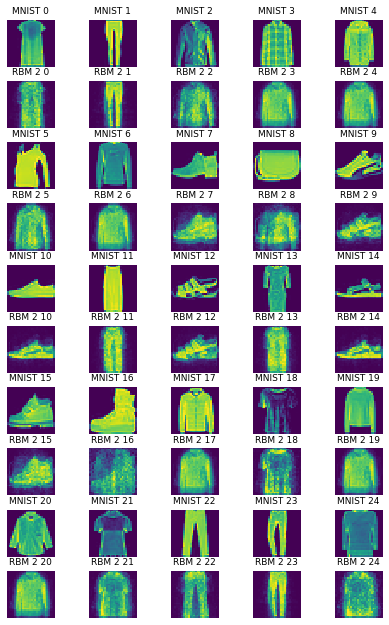

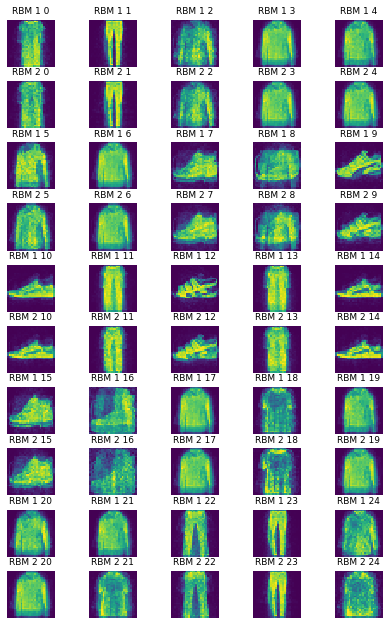

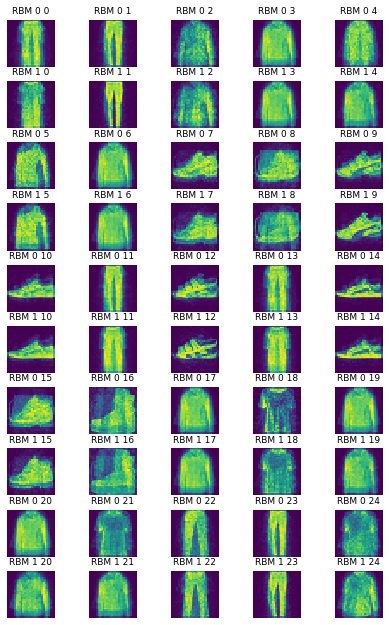

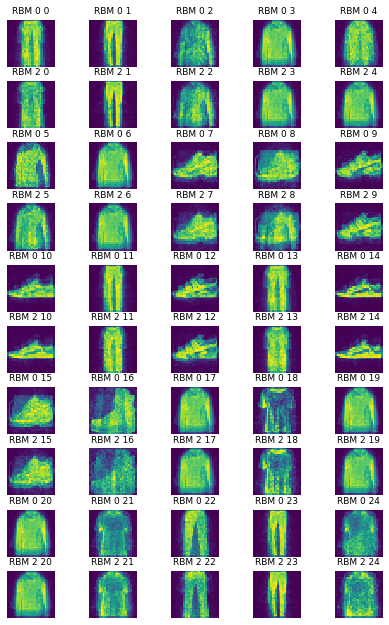

In [30]:
result_3 = get_result_image(x_tr, chain_rbm).reshape(len(x_tr), 28, 28)
show_results(samples, result_3,out_str = 'RBM 2', name = 'RBM_2')

show_results(result_2, result_3, in_str='RBM 1', out_str='RBM 2', name= 'RBM_1_2')
show_results(result_1, result_2, in_str='RBM 0', out_str='RBM 1', name= 'RBM_0_1')
show_results(result_1, result_3, in_str='RBM 0', out_str='RBM 2', name= 'RBM_0_2')

